<a href="https://colab.research.google.com/github/Selasi3/Fast_ai_projects/blob/main/Is_it_a_Bird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from fastbook import *

In [34]:
# !pip install fastbook


In [35]:
urls = search_images_ddg("bird photos", max_images=1)
len(urls), urls[0]

(1, 'https://wallpapercave.com/wp/wp3286715.jpg')

In [36]:
dest = Path("/content/birds-03.jpg")
if not dest.exists():
  download_url(urls[0], dest, show_progress=False)

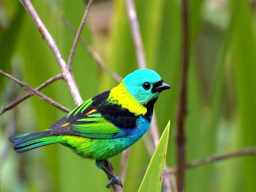

In [37]:
im = Image.open(dest)
im.to_thumb(256,256)

In [38]:
searches = "forest", "bird"
path = Path("/content/sample_data/bird_or_not")

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True,parents=True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)


In [39]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

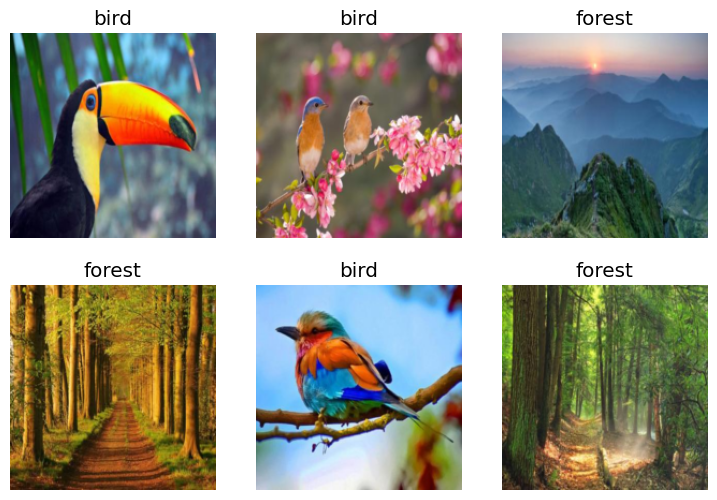

In [43]:
dls = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items=get_image_files,
                splitter=RandomSplitter(valid_pct=0.2, seed=42),
                get_y=parent_label,
                item_tfms=[Resize(192, method="squish")]).dataloaders(path)
dls.show_batch(max_n =6)

In [45]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 105MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.357414,0.099928,0.034247,01:37


epoch,train_loss,valid_loss,error_rate,time
0,0.013070,0.003314,0.000000,02:13
1,0.006686,0.000795,0.000000,02:14
2,0.005133,0.000343,0.000000,02:32


In [48]:
is_bird,_,probs = learn.predict(PILImage.create("/content/birds-03.jpg"))
print(f"This is a: {is_bird}")
print(f"Probability: {probs[0]:.4f}")

This is a: bird
Probability: 0.9999
